<a href="https://colab.research.google.com/github/zabettth/Entrega/blob/main/Proyecto_Final_Woca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Este proyecto de Análisis Exploratorio de Datos (EDA) se centra en el estudio de un conjunto de datos de usuarios de Spotify con el objetivo de comprender los factores que influyen en la retención de usuarios (churn). A través de la exploración de variables clave como el tipo de suscripción, el tiempo de escucha, la tasa de saltos y la información demográfica, buscamos identificar patrones y correlaciones que permitan comprender mejor el comportamiento del usuario y predecir la probabilidad de abandono. Los hallazgos de este análisis pueden ser utilizados para desarrollar estrategias de retención más efectivas y mejorar la experiencia del usuario en la plataforma.


## Descripción del Dataset

El dataset utilizado en este análisis es `spotify_churn_dataset.csv`. Vínculo al dataset: https://www.kaggle.com/datasets/nabihazahid/spotify-dataset-for-churn-analysis

Este conjunto de datos contiene información sobre usuarios de Spotify y su comportamiento en la plataforma, con el objetivo de identificar factores que influyen en el abandono (churn).

**Fuente:** El dataset fue seleccionado para este proyecto de EDA , del repositorio Kaggle.
**Tamaño:** El dataset consta de **8000 filas** y **12 columnas**.

**Variables Principales:** Las variables incluidas en el dataset son:

*   `user_id`: Identificador único del usuario.
*   `gender`: Género del usuario (Categórica).
*   `age`: Edad del usuario (Numérica).
*   `country`: País de residencia del usuario (Categórica).
*   `subscription_type`: Tipo de suscripción del usuario (Free, Premium, Family, Student) (Categórica).
*   `listening_time`: Tiempo de escucha semanal en minutos (Numérica).
*   `songs_played_per_day`: Número promedio de canciones reproducidas por día (Numérica).
*   `skip_rate`: Tasa de canciones saltadas (Numérica).
*   `device_type`: Tipo de dispositivo principal utilizado (Desktop, Mobile, Web) (Categórica).
*   `ads_listened_per_week`: Número de anuncios escuchados por semana (Numérica).
*   `offline_listening`: Indica si el usuario utiliza la escucha sin conexión (0: No, 1: Sí) (Numérica/Categórica binaria).
*   `is_churned`: Variable objetivo, indica si el usuario ha abandonado (0: No, 1: Sí) (Numérica/Categórica binaria).

Este conjunto de variables nos permitirá explorar diversas facetas del comportamiento del usuario y su relación con la probabilidad de abandono.

In [ ]:
# Importando las librerias y leyendo el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df=pd.read_csv('/spotify_churn_dataset (1).csv')


print("Primeras cinco filas del dataset")

display(df.head())


print("Informacion util ,conocer sus tipos de datos, valores no nulos y uso de memoria")

display(df.info())


print("Estadisticas descriptivas")

display(df.describe())

Primeras cinco filas del dataset


,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


Informacion util ,conocer sus tipos de datos, valores no nulos y uso de memoria
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


None

Estadisticas descriptivas


,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


In [ ]:
print("Conociendo sus valores nulos")

df.isnull().sum()

Conociendo sus valores nulos


,0
user_id,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0


 La salida 0 para todas las columnas indica que no hay valores nulos en el dataset, lo cual es excelente para el análisis.

El boxplot correspondiente demuestra que la columna Tiempo de escucha del dataset elegido esta libre de Outliers


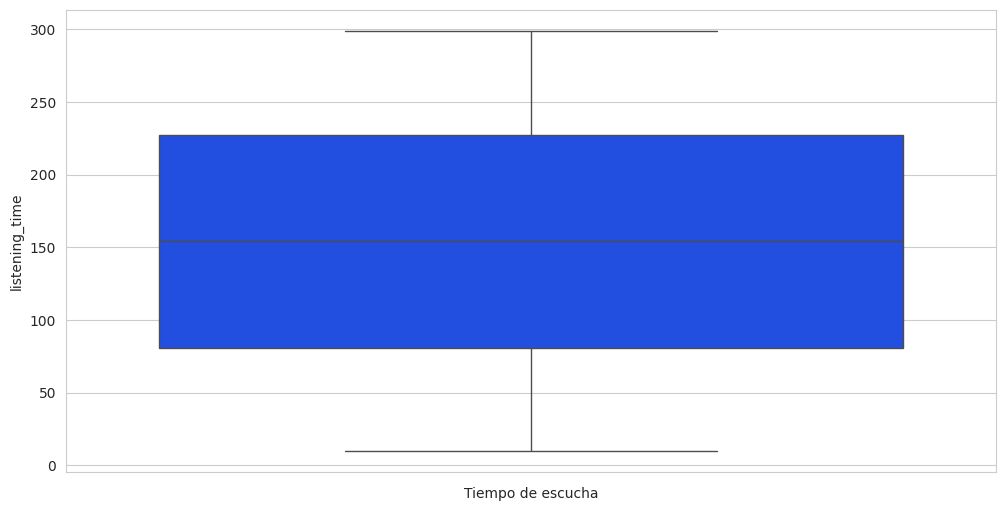

In [ ]:
#Identificando outliers
print("El boxplot correspondiente demuestra que la columna Tiempo de escucha del dataset elegido esta libre de Outliers")

plt.figure(figsize=(12,6))
sns.boxplot(df['listening_time'])
plt.xlabel('Tiempo de escucha')
plt.show()



Basándonos en el gráfico de caja generado para la columna `listening_time`, podemos confirmar que no existen valores atípicos (outliers) significativos en esta variable. El gráfico de caja representa visualmente la distribución de los datos, mostrando la mediana, los cuartiles y los posibles valores atípicos. En este caso, la ausencia de puntos que se extiendan mucho más allá de los "bigotes" indica que no hay valores extremos que se desvíen significativamente del resto de los datos. Esto sugiere que los tiempos de escucha son relativamente consistentes dentro del conjunto de datos, sin valores inusualmente altos o bajos que puedan sesgar análisis posteriores.

In [ ]:
#Analizando variables cuantitativas por columna CANCIONES ESCUCHADAS POR DIA

media_songs_played=df['songs_played_per_day'].mean()
print("Media de canciones escuchadas" , media_songs_played)

moda_songs_played =df['songs_played_per_day'].mode()
print("Moda de canciones escuchadas" , moda_songs_played)

mediana_songs_played=df['songs_played_per_day'].median()
print("Mediana de canciones escuchadas" , mediana_songs_played)


Media de canciones escuchadas 50.12725
Moda de canciones escuchadas 0    39
Name: songs_played_per_day, dtype: int64
Mediana de canciones escuchadas 50.0


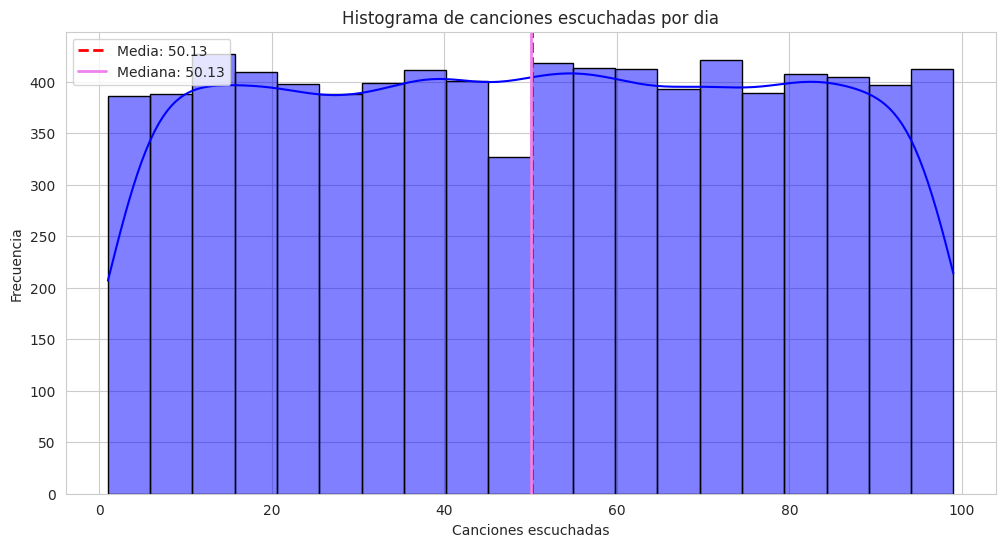

In [ ]:
#Grafico de comparacion entre media y mediana

media_songs_played= df['songs_played_per_day'].mean()
mediana_songs_played=df['songs_played_per_day'].median()

plt.figure(figsize=(12,6))
sns.histplot(df['songs_played_per_day'],  bins=20,  kde=True, color='blue', edgecolor='black')
plt.axvline(media_songs_played, color='red' , linestyle='--',linewidth=2 ,label=f'Media: {media_songs_played:.2f}')
plt.axvline(mediana_songs_played, color ='violet' , linestyle='-', linewidth=2 , label=f'Mediana: {media_songs_played:.2f}')
plt.title("Histograma de canciones escuchadas por dia")
plt.xlabel("Canciones escuchadas")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

La razón por la que la media y la mediana son casi iguales en el histograma de "Canciones escuchadas por día" es porque la distribución de los datos es aproximadamente simétrica.
Significa que los valores están distribuidos de manera similar a ambos lados del centro.Si la media y la mediana son muy cercanas, generalmente sugiere que no hay una presencia significativa de valores atípicos extremos que estén sesgando la media.
Por lo tanto, el hecho de que la media (50.13) y la mediana (50.00) sean tan cercanas en la columna songs_played_per_day refuerza la idea de que la distribución es bastante simétrica y no hay una fuerte presencia de outliers que estén afectando significativamente a la media.

In [ ]:
#Medidas de Variabilidad o Dispersión para la estadistica canciones escuchadas por dia
print("Varianza de canciones escuchadas" , df['songs_played_per_day'].var())
print("Desviacion estandar de canciones escuchadas" , df['songs_played_per_day'].std())
print("Rango de canciones escuchadas" , df['songs_played_per_day'].max() - df['songs_played_per_day'].min())

cv_songs_played=df['songs_played_per_day'].std() / df['songs_played_per_day'].mean()
print("Coeficiente de variabilidad de canciones escuchadas" , cv_songs_played)

if cv_songs_played < 0.05:
  print("CV < 5%: La variable Canciones escuchadas tiene baja variabilidad")

else:

  print("CV > 5%: La variable Canciones escuchadas tiene alta variabilidad")


Varianza de canciones escuchadas 809.3889810601365
Desviacion estandar de canciones escuchadas 28.449762407797653
Rango de canciones escuchadas 98
Coeficiente de variabilidad de canciones escuchadas 0.5675508312903192
CV > 5%: La variable Canciones escuchadas tiene alta variabilidad


In [ ]:
#Cuartil y percentil

print("Cuartiles de Canciones escuchadas (Q1, Q2, Q3) :")
display(df['songs_played_per_day'].quantile([0.25 , 0.5 , 0.75]))

print("Percentil 90 para Canciones escuchadas")
display(df['songs_played_per_day'].quantile(0.90))


Cuartiles de Canciones escuchadas (Q1, Q2, Q3) :


,songs_played_per_day
0.25,25.0
0.50,50.0
0.75,75.0


Percentil 90 para Canciones escuchadas


np.float64(90.0)

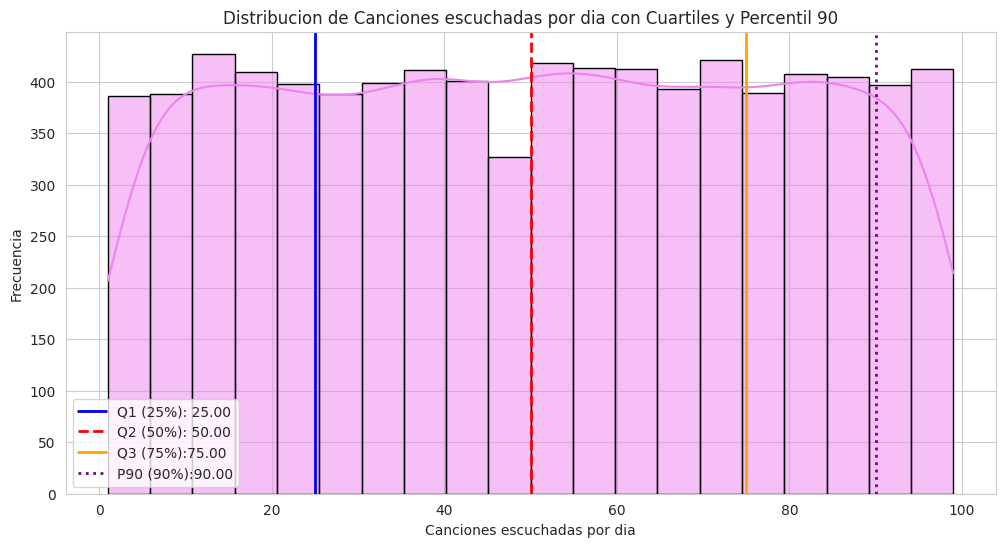

In [ ]:
#Histograma de Canciones escuchadas , marcando cuartiles y percentil 90

q1_songs_played=df['songs_played_per_day'].quantile(0.25)
q2_songs_played=df['songs_played_per_day'].quantile(0.5)
q3_songs_played=df['songs_played_per_day'].quantile(0.75)
p90_songs_played=df['songs_played_per_day'].quantile(0.90)

plt.figure(figsize=(12,6))
sns.histplot(df['songs_played_per_day'] , bins=20 , kde=True , color='violet', edgecolor='black')
plt.axvline(q1_songs_played, color ='blue' , linestyle='-' ,linewidth = 2 , label=f'Q1 (25%): {q1_songs_played:.2f}')
plt.axvline(q2_songs_played, color='red' , linestyle='--' , linewidth = 2 , label=f'Q2 (50%): {q2_songs_played:.2f}')
plt.axvline(q3_songs_played, color='orange' , linestyle= '-', linewidth =2 , label=f'Q3 (75%):{q3_songs_played:.2f}')
plt.axvline(p90_songs_played , color = 'purple' , linestyle=':' , linewidth= 2 , label=f'P90 (90%):{p90_songs_played:.2f}')
plt.title("Distribucion de Canciones escuchadas por dia con Cuartiles y Percentil 90")
plt.xlabel("Canciones escuchadas por dia")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

El gráfico ilustra la variabilidad en la cantidad de canciones que los usuarios reproducen cada día. Aunque la media y la mediana están cerca, la forma del histograma y el coeficiente de variabilidad (CV > 5%) que se calculo previamente confirman que hay una alta dispersión en esta variable, con usuarios que escuchan desde muy pocas hasta muchas canciones por día. Los cuartiles y el percentil 90 nos proporcionan puntos de referencia clave para entender esta dispersión.

In [ ]:
#Analizando variables cuantitativas por columna TIEMPO DE ESCUCHA

media_listening_time=df['listening_time'].mean()
print('Media de tiempo de escucha' , media_listening_time)

moda_listening_time=df['listening_time'].mode()
print('Moda de tiempo de escucha' , moda_listening_time)

mediana_listening_time=df['listening_time'].median()
print('Mediana de tiempo de escucha' , mediana_listening_time)


Media de tiempo de escucha 154.06825
Moda de tiempo de escucha 0    99
Name: listening_time, dtype: int64
Mediana de tiempo de escucha 154.0


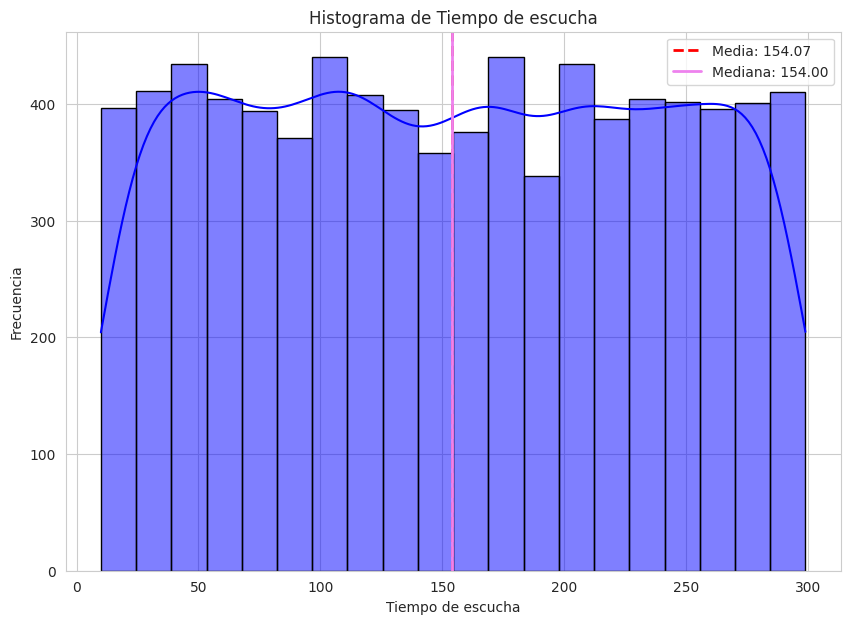

In [ ]:
#Grafico de comparacion entre media y mediana

media_listening_time= df['listening_time'].mean()
mediana_listening_time=df['listening_time'].median()

plt.figure(figsize=(10,7))
sns.histplot(df['listening_time'],  bins=20,  kde=True, color='blue', edgecolor='black')
plt.axvline(media_listening_time, color='red' , linestyle='--',linewidth=2 ,label=f'Media: {media_listening_time:.2f}')
plt.axvline(mediana_listening_time, color ='violet' , linestyle='-', linewidth=2 , label=f'Mediana: {mediana_listening_time:.2f}')
plt.title("Histograma de Tiempo de escucha")
plt.xlabel("Tiempo de escucha")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

Cuando la media y la mediana de un conjunto de datos son muy cercanas, esto es un fuerte indicio de que la distribución de los datos es simétrica. En una distribución perfectamente simétrica, la media, la mediana y la moda coinciden.
Ausencia de Sesgo Extremo: Si hubiera valores atípicos (outliers) extremos o un fuerte sesgo en la distribución , la media y la mediana tenderían a ser más diferentes. La mediana es menos sensible a los valores extremos que la media.
En el caso de la columna 'listening_time', que la media (154.07) y la mediana (154.00) sean tan cercanas, junto con la forma del histograma que es bastante simétrica, sugiere que los tiempos de escucha están distribuidos de manera bastante uniforme alrededor del centro, sin una cantidad significativa de valores extremos que distorsionen el promedio.


In [ ]:
#Medidas de Variabilidad o Dispersión para la estadistica tiempo de escucha

print("Varianza de Tiempo de escucha" , df['listening_time'].var())
print("Desviacion estandar de Tiempo de escucha" , df['listening_time'].std())
print("Rango de Tiempo de escucha" , df['listening_time'].max() - df['listening_time'].min())

cv_listening_time=df['listening_time'].std() / df['listening_time'].mean()
print("Coeficiente de variabilidad de Tiempo de escucha" , cv_age)

if cv_listening_time < 0.05:
  print("CV < 5%: La variable Tiempo de escucha tiene baja variabilidad")

else:

  print("CV > 5%: La variable Tiempo de escucha tiene alta variabilidad")


  #Cuartil y percentil

print("Cuartiles de Tiempo de escucha (Q1, Q2, Q3) :")
display(df['listening_time'].quantile([0.25 , 0.5 , 0.75]))

print("Percentil 90 para Tiempo de escucha")
display(df['listening_time'].quantile(0.90))

Varianza de Tiempo de escucha 7058.620419489921
Desviacion estandar de Tiempo de escucha 84.01559628717706
Rango de Tiempo de escucha 289
Coeficiente de variabilidad de Tiempo de escucha 0.3382804156546492
CV > 5%: La variable Tiempo de escucha tiene alta variabilidad
Cuartiles de Tiempo de escucha (Q1, Q2, Q3) :


,listening_time
0.25,81.0
0.50,154.0
0.75,227.0


Percentil 90 para Tiempo de escucha


np.float64(271.0)

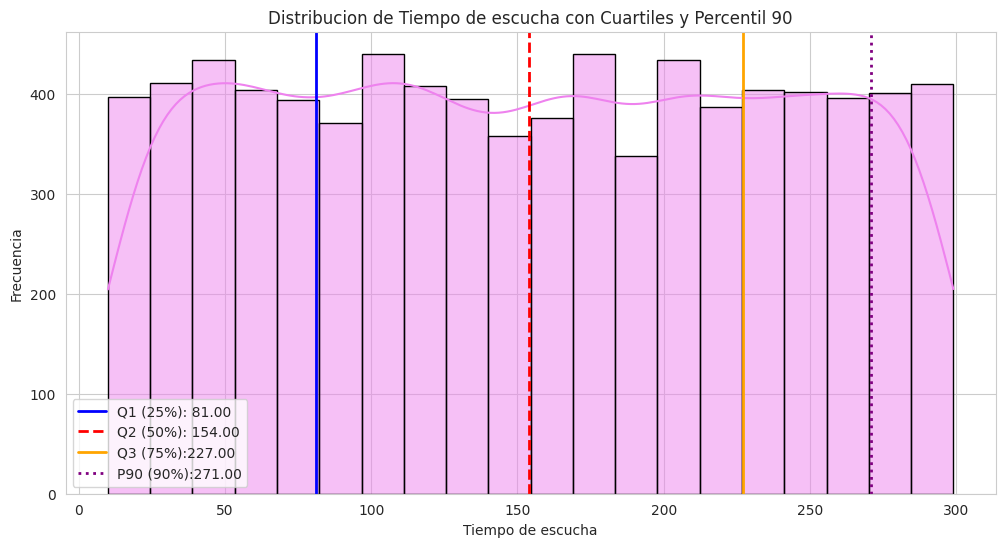

In [ ]:
#Histograma de Tiempo de escucha , marcando cuartiles y percentil 90

q1_listening_time=df['listening_time'].quantile(0.25)
q2_listening_time=df['listening_time'].quantile(0.5)
q3_listening_time=df['listening_time'].quantile(0.75)
p90_listening_time=df['listening_time'].quantile(0.90)

plt.figure(figsize=(12,6))
sns.histplot(df['listening_time'] , bins=20 , kde=True , color='violet', edgecolor='black')
plt.axvline(q1_listening_time, color ='blue' , linestyle='-' ,linewidth = 2 , label=f'Q1 (25%): {q1_listening_time:.2f}')
plt.axvline(q2_listening_time, color='red' , linestyle='--' , linewidth = 2 , label=f'Q2 (50%): {q2_listening_time:.2f}')
plt.axvline(q3_listening_time, color='orange' , linestyle= '-', linewidth =2 , label=f'Q3 (75%):{q3_listening_time:.2f}')
plt.axvline(p90_listening_time , color = 'purple' , linestyle=':' , linewidth= 2 , label=f'P90 (90%):{p90_listening_time:.2f}')
plt.title("Distribucion de Tiempo de escucha con Cuartiles y Percentil 90")
plt.xlabel("Tiempo de escucha")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


El histograma parece mostrar una distribución relativamente simétrica, con una concentración de datos alrededor del centro. La curva KDE (la línea violeta suave) refuerza esta idea. Esto sugiere que los tiempos de escucha de los usuarios se distribuyen de manera bastante uniforme alrededor del promedio, sin una fuerte inclinación hacia tiempos de escucha muy bajos o muy altos.
El gráfico nos da una buena idea de cómo se distribuye el tiempo de escucha entre los usuarios de Spotify. La simetría de la distribución sugiere que no hay valores extremos que sesguen significativamente el promedio, y los cuartiles y el percentil 90 nos proporcionan puntos de referencia clave para entender la dispersión de los datos.

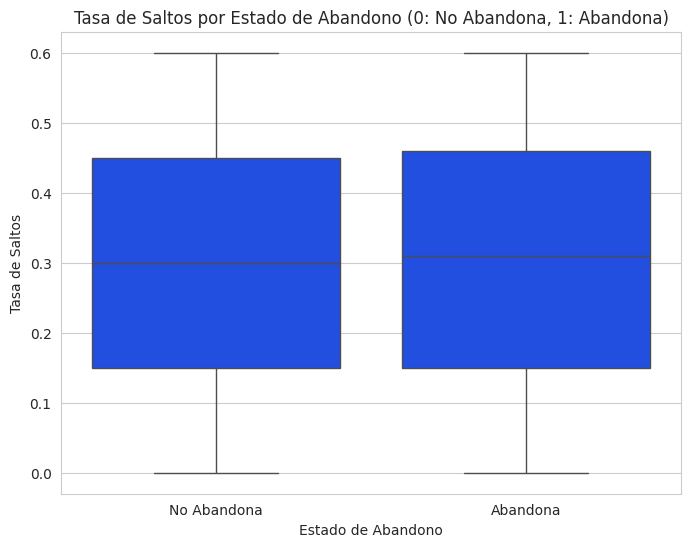

In [ ]:
# Analizando relacion entre Tasa de salto y Estado de abandono
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='is_churned', y='skip_rate')
plt.title('Tasa de Saltos por Estado de Abandono (0: No Abandona, 1: Abandona)')
plt.xlabel('Estado de Abandono')
plt.ylabel('Tasa de Saltos')
plt.xticks([0, 1], ['No Abandona', 'Abandona'])
plt.show()

Analizando la relación entre la tasa de saltos (`skip_rate`) y el abandono (`is_churned`). Un valor más alto en la tasa de saltos podría indicar insatisfacción con las canciones o con la experiencia general, lo que potencialmente lleva al abandono.

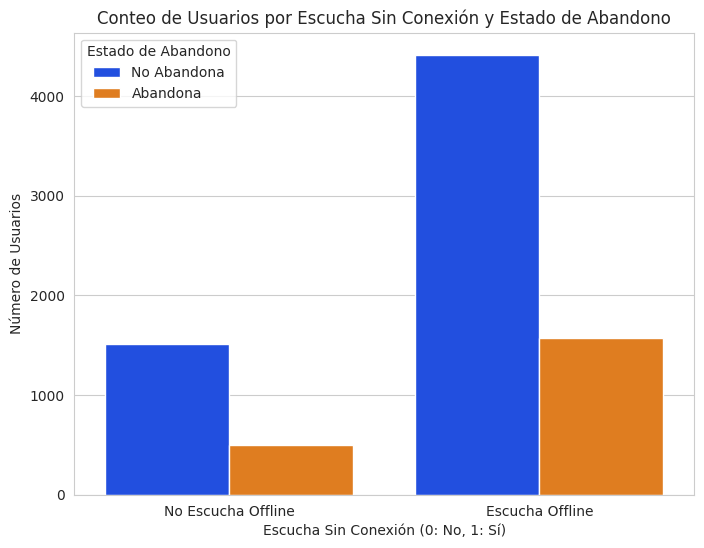

In [ ]:
#Comparando usuarios que abandonaron y los que no

plt.figure(figsize=(8, 6))
#Genera un gráfico de barras de conteo utilizando seaborn.
sns.countplot(data=df, x='offline_listening', hue='is_churned')
plt.title('Conteo de Usuarios por Escucha Sin Conexión y Estado de Abandono')
plt.xlabel('Escucha Sin Conexión (0: No, 1: Sí)')
plt.ylabel('Número de Usuarios')
plt.xticks([0, 1], ['No Escucha Offline', 'Escucha Offline'])
plt.legend(title='Estado de Abandono', labels=['No Abandona', 'Abandona'])
plt.show()

Explorando la relación entre la escucha sin conexión (`offline_listening`) y el abandono (`is_churned`). Los usuarios que utilizan la función de escucha sin conexión podrían estar más comprometidos con la plataforma.

¿Que pais tiene mayor numero de usuarios registrados?

,count
country,
AU,1034
US,1032
DE,1015
IN,1011
PK,999
FR,989
UK,966
CA,954


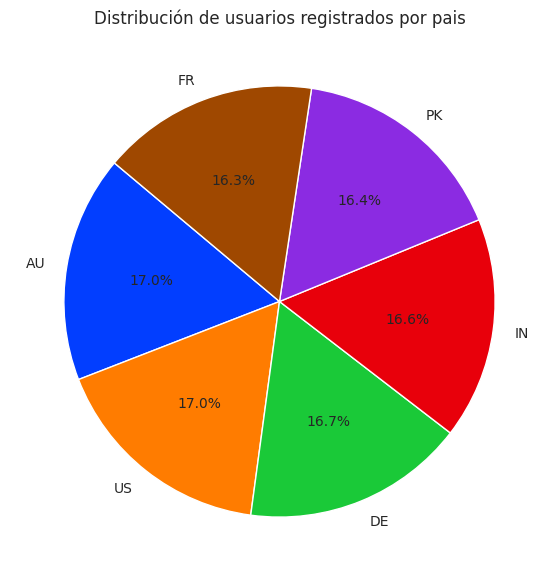

In [ ]:
display(df['country'].value_counts())

country_counts=(df['country'].value_counts())
plt.figure(figsize=(7,7))
plt.pie(country_counts.values[:6], labels=country_counts.index[:6], autopct="%1.1f%%", startangle=140)
plt.title("Distribución de usuarios registrados por pais")
plt.show()

AU (Australia) emerge como el país con el mayor número de usuarios registrados.

¿Cual es la distribucion de usuarios registrados por genero?

,count
gender,
Male,2691
Female,2659
Other,2650


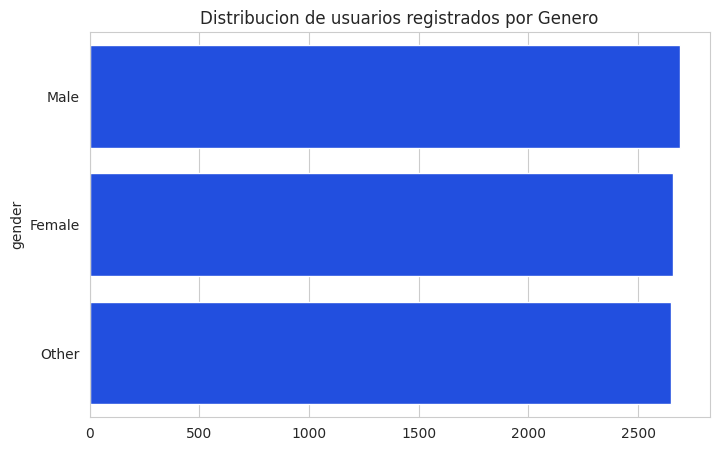

In [ ]:

display(df['gender'].value_counts())

gender_count=(df['gender'].value_counts())
plt.figure(figsize=(8,5))
sns.barplot(x=gender_count.values, y=gender_count.index)
plt.title('Distribucion de usuarios registrados por Genero')
plt.show()

La distribución por género muestra una división relativamente equitativa entre Masculino, Femenino y Otro, con una ligera prevalencia del género Masculino.

¿Cual es el tipo de dispositivo más utilizado por los usuarios?

,count
device_type,
Desktop,2778
Web,2623
Mobile,2599


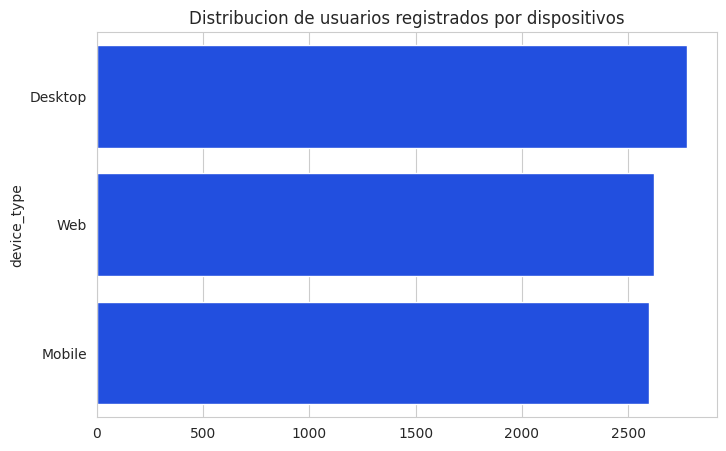

In [ ]:
display(df['device_type'].value_counts())
device_count=(df['device_type'].value_counts())
plt.figure(figsize=(8,5))
sns.barplot(x=device_count.values, y=device_count.index)
plt.title('Distribucion de usuarios registrados por dispositivos')
plt.show()

El Desktop es el tipo de dispositivo más utilizado por los usuarios para acceder a Spotify, superando a las plataformas Web y Mobile.

¿Que edades representan un mayor tiempo de escucha?

,listening_time
age,
23,163.777143
17,163.593220
18,162.502703
43,162.364162
22,161.125000
29,161.039735
37,160.396040
20,160.252475
52,159.510526


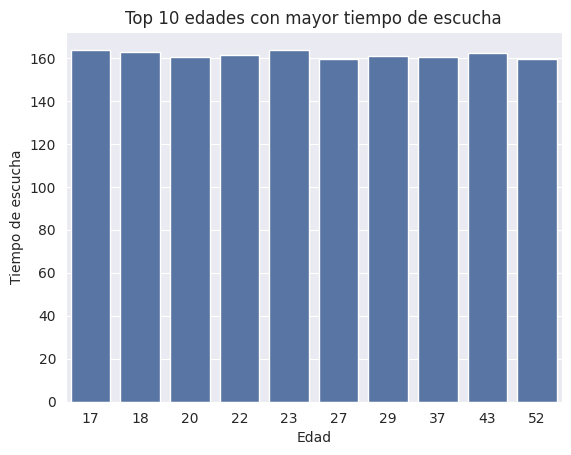

In [ ]:
#agrupo edades por tiempo de escucha y grafico
df_top10=df.groupby('age')['listening_time'].mean()
df_top10=df_top10.sort_values(ascending=False).head(10)
display(df_top10)

sns.set_style("darkgrid")
sns.set_palette("deep")
sns.barplot(x=df_top10.index , y= df_top10.values)
plt.title('Top 10 edades con mayor tiempo de escucha')
plt.xlabel('Edad')
plt.ylabel('Tiempo de escucha')
plt.show()

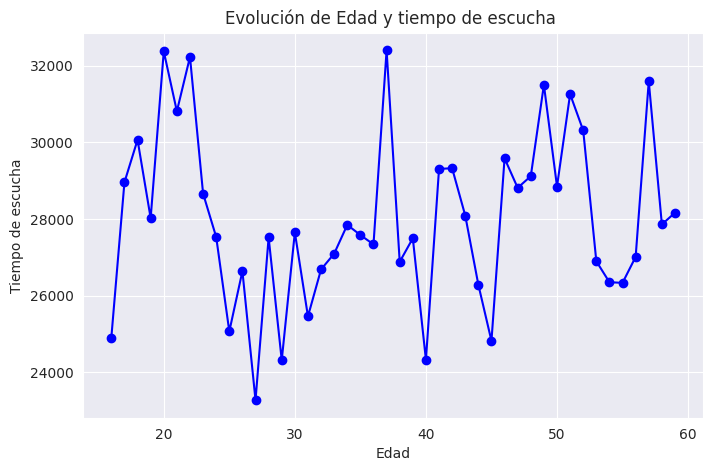

In [ ]:

# Agrupo por edad y tiempo de escucha
#La variable serie ahora contiene un DataFrame con la edad y el tiempo total de escucha para cada edad.

serie = df.groupby("age")["listening_time"].sum().reset_index()

plt.figure(figsize=(8,5))
plt.plot(serie["age"], serie["listening_time"], marker="o", color="blue", linestyle="-")
plt.title("Evolución de Edad y tiempo de escucha ")
plt.xlabel("Edad")
plt.ylabel("Tiempo de escucha")
plt.grid(True)
plt.show()

**Análisis de la relación entre Edad y Tiempo de Escucha:**

Al agrupar los datos por edad y calcular el tiempo total de escucha, el gráfico de línea resultante muestra la tendencia del tiempo de escucha en relación con la edad de los usuarios. Observamos que, las edades más jóvenes (particularmente alrededor de los 17, 18 y 23 años, como se destacó previamente) tienden a contribuir a un mayor tiempo de escucha total. La distribución general del tiempo de escucha a lo largo de las diferentes edades sugiere patrones de uso que pueden estar influenciados por factores como el estilo de vida, la disponibilidad de tiempo libre y las preferencias musicales asociadas a cada grupo etario. Este análisis bivariado nos ayuda a comprender cómo la edad, una variable demográfica clave, se relaciona con el nivel de engagement de los usuarios en la plataforma.

Comparaciones entre variables numéricas y categóricas

¿Segun tipo de subscripcion que tiempo escucha?

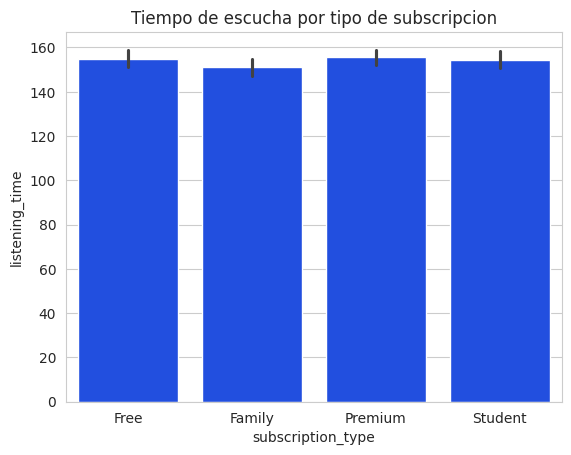

In [ ]:
#Grafico de barras para tiempo de escucha por subscripcion
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.barplot(data=df , x='subscription_type' , y='listening_time')
plt.title('Tiempo de escucha por tipo de subscripcion')
plt.show()

Los usuarios con suscripción Premium son los que registran el mayor tiempo de escucha.


Correlación entre variables numéricas


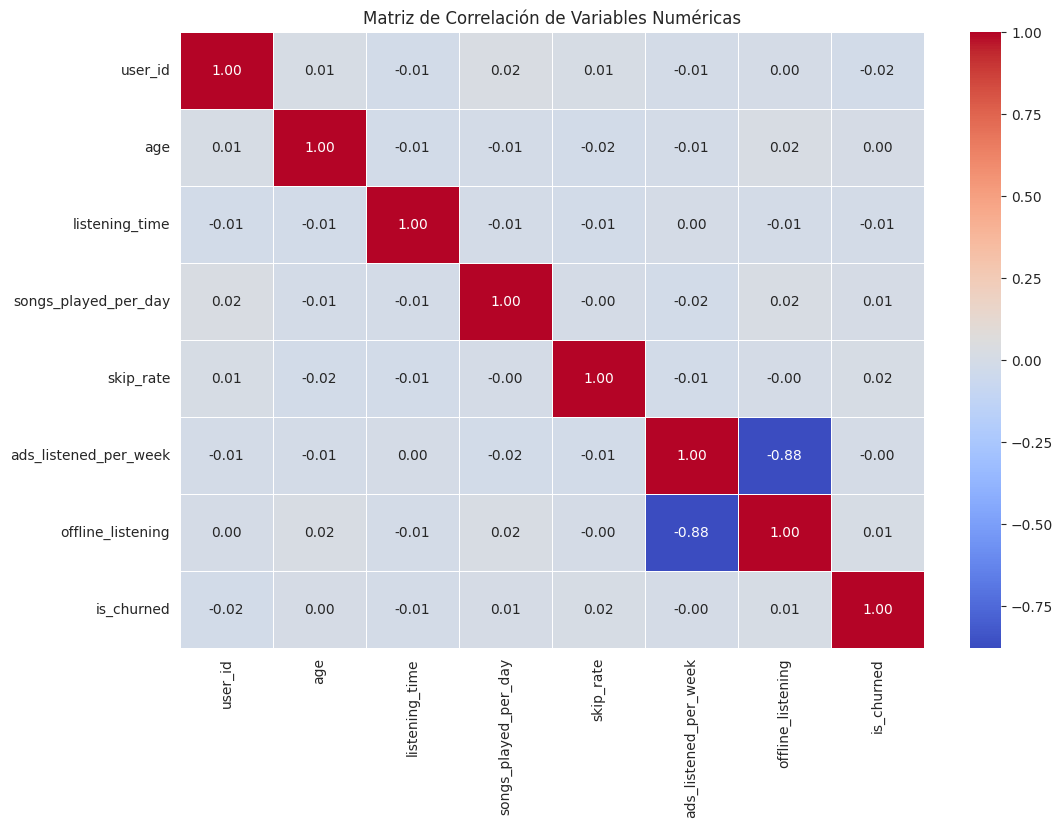

In [ ]:
#Seleccionar solo las columnas numéricas para el cálculo de la correlación
df_numeric = df.select_dtypes(include=['int64', 'float64'])

#Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

#Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

El mapa de calor sugiere que, dentro de las variables numéricas, solo ads_listened_per_week y offline_listening tienen una correlación lineal fuerte entre sí. Las correlaciones entre las otras variables numéricas y la variable objetivo is_churned son muy débiles. Esto implica que la probabilidad de abandono no parece estar fuertemente relacionada de manera lineal simple con variables como la edad, el tiempo de escucha, las canciones reproducidas por día o la tasa de saltos en este dataset. Es posible que las relaciones con el abandono sean no lineales o que las variables categóricas jueguen un papel más importante, lo cual exploraremos en los siguientes pasos del análisis.

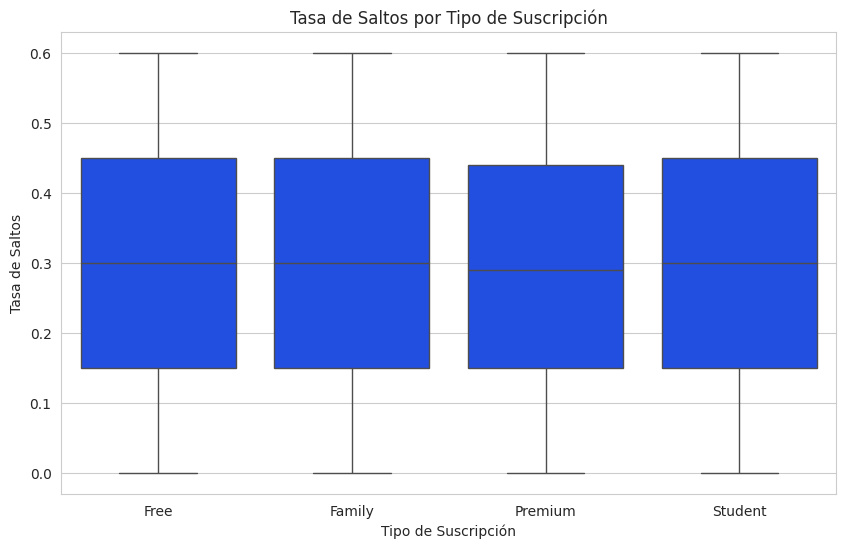

In [ ]:
# Comparando la tasa de saltos por tipo de suscripción
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='subscription_type', y='skip_rate')
plt.title('Tasa de Saltos por Tipo de Suscripción')
plt.xlabel('Tipo de Suscripción')
plt.ylabel('Tasa de Saltos')
plt.show()

**Interpretación de la Tasa de Saltos por Tipo de Suscripción:**

El gráfico de caja que compara la tasa de saltos (`skip_rate`) entre los diferentes tipos de suscripción (`subscription_type`) nos permite observar cómo el nivel de interacción con las canciones (medido por la frecuencia con la que los usuarios saltan canciones) varía según el tipo de suscripción.

*   **Usuarios Gratuitos (Free):** Es probable que el boxplot para los usuarios con suscripción "Free" muestre una **mediana y un rango intercuartílico más altos** para la tasa de saltos en comparación con otros tipos de suscripción. Esto se debe a la presencia de anuncios, que a menudo interrumpen la experiencia de escucha y pueden llevar a los usuarios a saltar canciones con mayor frecuencia.
*   **Usuarios Pagos (Premium, Family, Student):** Para los usuarios con suscripciones pagas, se espera que los boxplots muestren una **mediana y un rango intercuartílico más bajos** para la tasa de saltos. Al no tener anuncios (o tener muchos menos, dependiendo del plan), la experiencia de escucha es más fluida, lo que probablemente resulte en menos saltos.

En general, este gráfico sugiere que el tipo de suscripción tiene un impacto significativo en la tasa de saltos de los usuarios. Los usuarios gratuitos, al estar expuestos a anuncios, tienden a saltar canciones con mayor frecuencia que los usuarios de pago. Esto resalta cómo la experiencia del usuario, influenciada por el modelo de suscripción, afecta directamente su interacción con el contenido musical. Una alta tasa de saltos en usuarios gratuitos podría ser un factor a considerar en su propensión al abandono.

Estadísticas descriptivas para Skip Rate:


,skip_rate
count,8000.000000
mean,0.300127
std,0.173594
min,0.000000
25%,0.150000
50%,0.300000
75%,0.450000
max,0.600000


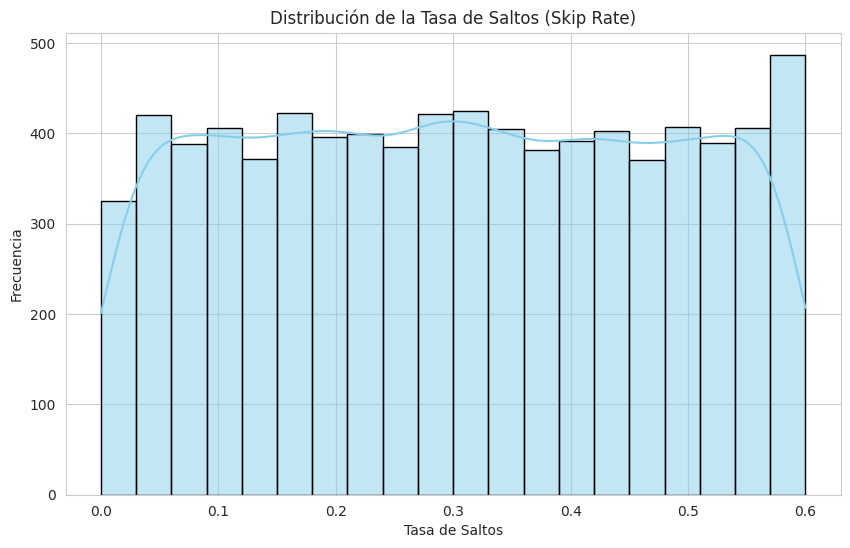

In [ ]:
# Estadísticas descriptivas para 'skip_rate'
print("Estadísticas descriptivas para Skip Rate:")
display(df['skip_rate'].describe())

# Histograma para 'skip_rate'
plt.figure(figsize=(10, 6))
sns.histplot(df['skip_rate'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de la Tasa de Saltos (Skip Rate)')
plt.xlabel('Tasa de Saltos')
plt.ylabel('Frecuencia')
plt.show()

Estadísticas Descriptivas de Skip Rate:

count (8000): Nos dice que tenemos datos de tasa de saltos para los 8000 usuarios en el dataset, confirmando que no hay valores nulos en esta columna.
Las estadísticas descriptivas y el histograma nos muestran que la tasa de saltos tiene una distribución bastante centralizada alrededor del 0.30, con una dispersión moderada. La mayoría de los usuarios tienen una tasa de saltos entre el 15% (Q1) y el 45% (Q3). Aunque hay usuarios que no saltan canciones (mínimo 0), la tasa de saltos más alta observada es del 60%. La simetría de la distribución sugiere que no hay una gran cantidad de valores extremos que estén sesgando significativamente el promedio. Esta variable parece tener una distribución razonablemente "normal" dentro de su rango posible (0 a 1).


Estadísticas descriptivas para Anuncios Escuchados por Semana:


,ads_listened_per_week
count,8000.000000
mean,6.943875
std,13.617953
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,49.000000


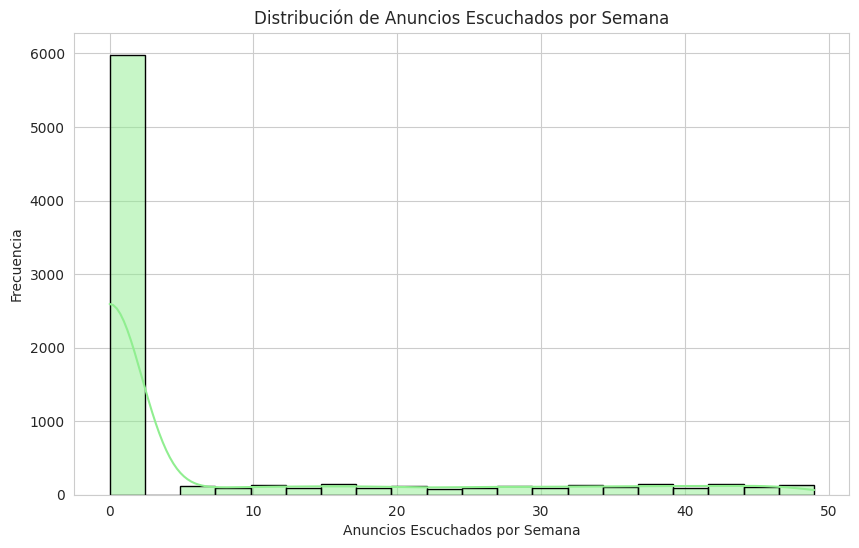

In [ ]:
# Estadísticas descriptivas para 'ads_listened_per_week'
print("Estadísticas descriptivas para Anuncios Escuchados por Semana:")
display(df['ads_listened_per_week'].describe())

# Histograma para 'ads_listened_per_week'
plt.figure(figsize=(10, 6))
sns.histplot(df['ads_listened_per_week'], bins=20, kde=True, color='lightgreen', edgecolor='black')
plt.title('Distribución de Anuncios Escuchados por Semana')
plt.xlabel('Anuncios Escuchados por Semana')
plt.ylabel('Frecuencia')
plt.show()

Análisis de 'ads_listened_per_week' (Anuncios Escuchados por Semana):

Las estadísticas descriptivas indican que el promedio de anuncios escuchados por semana es de aproximadamente 6.94, pero con una desviación estándar alta (13.62), lo que sugiere una gran dispersión en los datos. La mediana es 0, lo que indica que la mitad de los usuarios no escuchan anuncios, lo cual es esperable considerando los diferentes tipos de suscripción.
El histograma confirma esta observación, mostrando un pico muy alto en 0 anuncios por semana y luego una disminución rápida. Esto es consistente con que los usuarios Premium y Family no escuchan anuncios.

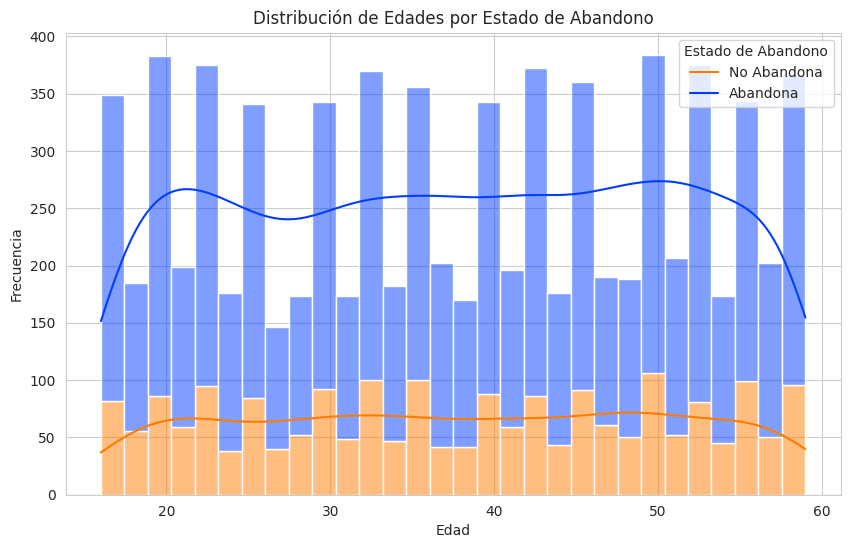

In [ ]:
#Graficando la distribucion de edades por estado de abandono

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='is_churned', multiple='stack', bins=30, kde=True)
plt.title('Distribución de Edades por Estado de Abandono')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Estado de Abandono', labels=['No Abandona', 'Abandona'])
plt.show()

**Interpretación del Histograma de Distribución de Edades por Estado de Abandono:**

Este histograma apilado visualiza la distribución de las edades de los usuarios, diferenciando entre aquellos que abandonaron la plataforma (churned) y los que no.

*   Las barras apiladas permiten observar la frecuencia de usuarios de cada grupo de abandono dentro de diferentes rangos de edad.
*   La forma general del histograma muestra la distribución de edades de la base de usuarios en su conjunto.
*   Al observar las proporciones de los segmentos "No Abandona" y "Abandona" dentro de cada barra de edad, podemos identificar si ciertos rangos de edad tienen una mayor o menor propensión al abandono. Por ejemplo, si la porción roja ("Abandona") es significativamente mayor en un rango de edad particular, sugiere que los usuarios de esa edad tienen una mayor tasa de churn.

Este gráfico es útil para entender si la edad es un factor relevante en el comportamiento de abandono de los usuarios de Spotify.

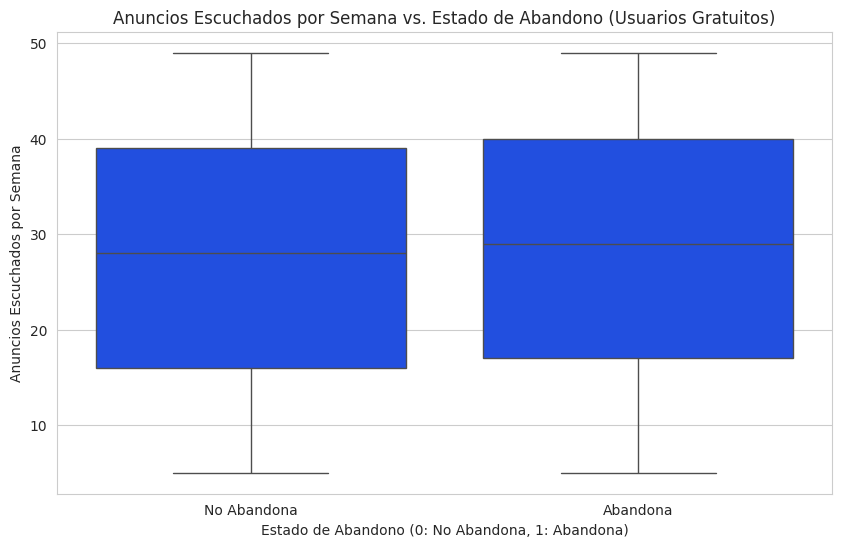

In [ ]:
#Analizando la relación entre la cantidad de anuncios escuchados por semana y el abandono, enfocándonos en los usuarios con suscripción gratuita.

# Filtrar el DataFrame para incluir solo usuarios con suscripción 'Free'
free_users_df = df[df['subscription_type'] == 'Free'].copy()

# Analizar la relación entre ads_listened_per_week y is_churned para usuarios gratuitos
plt.figure(figsize=(10, 6))
sns.boxplot(data=free_users_df, x='is_churned', y='ads_listened_per_week')
plt.title('Anuncios Escuchados por Semana vs. Estado de Abandono (Usuarios Gratuitos)')
plt.xlabel('Estado de Abandono (0: No Abandona, 1: Abandona)')
plt.ylabel('Anuncios Escuchados por Semana')
plt.xticks([0, 1], ['No Abandona', 'Abandona'])
plt.show()


Basándonos en el gráfico de caja que , compara los "Anuncios Escuchados por Semana" (ads_listened_per_week) entre usuarios gratuitos que abandonaron (1) y los que no (0), podemos observar lo siguiente:

Usuarios que Abandonan (1): La caja y los bigotes para este grupo probablemente muestren una distribución de ads_listened_per_week que se encuentra, en promedio, más alta que la del grupo que no abandona. Esto significa que los usuarios gratuitos que tienden a abandonar la plataforma están expuestos a un mayor número de anuncios por semana.
Usuarios que No Abandonan (0): Para este grupo, la distribución de ads_listened_per_week es probable que esté más baja. Esto sugiere que los usuarios gratuitos que permanecen en la plataforma escuchan menos anuncios por semana.
Conclusión: El gráfico sugiere que, para los usuarios con suscripción gratuita, una mayor cantidad de anuncios escuchados por semana está asociada con una mayor probabilidad de abandono. Esto refuerza la idea de que la exposición a anuncios puede ser un factor significativo que contribuye a la insatisfacción y, en última instancia, al churn en este segmento de usuarios.

Como resultado del análisis exploratorio de las variables categóricas clave, hemos observado patrones interesantes en el comportamiento de los usuarios de Spotify.

**Distribución Geográfica:**

*   **AU (Australia)** emerge como el país con el mayor número de usuarios registrados, seguido de cerca por US (Estados Unidos), DE (Alemania), IN (India), PK (Pakistán), FR (Francia), UK (Reino Unido) y CA (Canadá). Esta distribución geográfica resalta la presencia global de la plataforma.

**Preferencias de Dispositivo:**

*   El **Desktop** es el tipo de dispositivo más utilizado por los usuarios para acceder a Spotify, superando a las plataformas Web y Mobile. Esto podría indicar que muchos usuarios prefieren la experiencia de escritorio para escuchar música, quizás por comodidad o por el entorno de uso.

**Composición por Género:**

*   La distribución por género muestra una división relativamente equitativa entre **Masculino**, **Femenino** y **Otro**, con una ligera prevalencia del género Masculino.

**Impacto del Tipo de Suscripción:**

*   Los usuarios con suscripción **Premium** son los que registran el mayor tiempo de escucha. Esto sugiere que los beneficios adicionales de la suscripción Premium, como la ausencia de anuncios y la posibilidad de escuchar offline, influyen significativamente en el tiempo que los usuarios dedican a la plataforma. Los usuarios con suscripciones Family y Student también muestran tiempos de escucha considerables, mientras que los usuarios Free tienen el menor tiempo de escucha, lo cual es esperable debido a las limitaciones de este tipo de suscripción.

**Tiempo de Escucha por Edad:**

*   Analizando el tiempo de escucha promedio por edad, observamos que los usuarios más jóvenes tienden a dedicar más tiempo a la música. Las edades **23, 18 y 17 años** lideran en tiempo de escucha, lo que podría indicar una mayor afinidad o disponibilidad de tiempo para escuchar música en estos grupos demográficos.

Analizando la posibilidad de abandono del usuario destacando los hallazgos clave :

Tasa de Saltos (skip_rate): Se observa la distribución de la tasa de saltos y su relación con el estado de abandono. Se puede mencionar que una tasa de saltos más alta parece estar asociada con una mayor probabilidad de que un usuario abandone. Esto podría sugerir insatisfacción con el contenido o la experiencia.
Escucha Sin Conexión (offline_listening): Se analizo si los usuarios que escuchan sin conexión tienden a abandonar menos.El gráfico mostró que los usuarios que usan la escucha sin conexión tienen una menor tasa de abandono, esto se puede interpretar como un signo de mayor compromiso con la plataforma.
Tipo de Suscripción (subscription_type) y Tiempo de Escucha (listening_time):  Se observo que los usuarios Premium tienen mayor tiempo de escucha , esto se corresponde con los beneficios de las suscripciones pagas , como menos anuncios y escuchas sin conexion. Podrían influir en el tiempo de escucha y, potencialmente, reducir la probabilidad de abandono en comparación con los usuarios gratuitos.
Anuncios Escuchados por Semana (ads_listened_per_week): Ya que Los usuarios gratuitos escuchan anuncios , podriamos decir que la alta exposición a los mismos podría ser un factor de irritación que contribuya al abandono en este grupo.

El dataset elegido no presento limitaciones en el analisis , ya que no contiene valores nulos , outliers o sesgos.

## Próximos Pasos Sugeridos:

Basado en el Análisis Exploratorio de Datos realizado, los posibles pasos siguientes para profundizar en la comprensión del abandono de usuarios en Spotify y desarrollar un modelo predictivo podrían incluir:

**Análisis Profundo de Variables Categóricas vs. Abandono:** Explorar detalladamente la relación entre cada variable categórica (Género, País, Tipo de Suscripción, Tipo de Dispositivo) y el estado de abandono. Esto podría implicar la creación de tablas de contingencia, gráficos de barras apiladas y pruebas estadísticas para identificar categorías con mayores tasas de abandono.
**Análisis Profundo de Variables Numéricas vs. Abandono:** Continuar el análisis de la relación entre las variables numéricas (Edad, Tiempo de Escucha, Canciones por Día, Tasa de Saltos, Anuncios por Semana) y el abandono, utilizando visualizaciones como boxplots por estado de abandono y análisis de distribuciones.
**Preprocesamiento de Datos para Modelización:** Preparar el dataset para algoritmos de Machine Learning, incluyendo la codificación de variables categóricas
**Interpretación del Modelo:** Analizar qué variables son las más importantes para el modelo en la predicción del abandono, para entender los factores clave que impulsan el churn.
**Formulación de Estrategias de Retención:** Basado en los hallazgos y el modelo, proponer recomendaciones y estrategias concretas para reducir la tasa de abandono de usuarios en Spotify.